In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fs = 9
plt.style.use("tableau-colorblind10")
plt.rcParams["font.size"] = fs
plt.rcParams["axes.titlesize"] = plt.rcParams["font.size"]
plt.rcParams["legend.handlelength"] = 1.5
plt.rcParams["legend.frameon"] = False

def cm2inch(x,y): return [x/2.54, y/2.54]

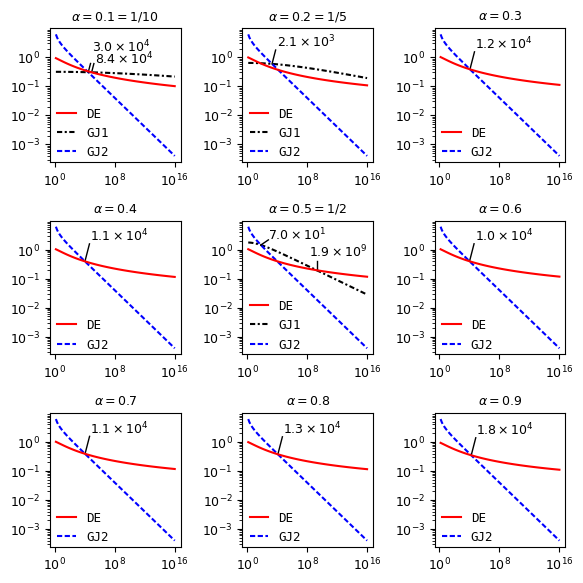

In [12]:
D = pd.read_csv("./data-fig2.csv")
IS = pd.read_csv("./data-fig2_de-gj2.csv")
fig, ax = plt.subplots(3, 3, figsize=cm2inch(15,15), dpi=100)

for αx10 in range(1,10):
    i, j = (αx10-1)//3, (αx10-1)%3
    x = D["κ"]
    y = D["de_%d" % (αx10)]
    ax[i][j].plot(x, y, c="r", label="DE", zorder=3)
    
for αx10 in [1,2,5]:
    i, j = (αx10-1)//3, (αx10-1)%3
    x = D["κ"]
    y = D["gj1_%d" % (αx10)]
    ax[i][j].plot(x, y, c="k", label="GJ1", zorder=1, ls=(0,(2.5,1.2,1,1.2)))


for αx10 in range(1,10):
    i, j = (αx10-1)//3, (αx10-1)%3
    x = D["κ"]
    y = D["gj2_%d" % (αx10)]
    ax[i][j].plot(x, y, c="b", label="GJ2", zorder=2, ls=(0,(2.5,1.2)))
       
for i in range(3):
    for j in range(3):
        ax[i][j].set_xscale("log")
        ax[i][j].set_yscale("log")
        ax[i][j].set_xticks([1e0, 1e8, 1e16])
        ax[i][j].set_yticks([1e-3, 1e-2, 1e-1, 1e0])
        αx10 = 3*i+j+1
        title = "$\\alpha = 0.%d$" % (αx10)
        if αx10 in [1,2,5]:
            title += "$=1/%s$" % (10 // αx10)
            
        ax[i][j].set_title(title)
        ax[i][j].legend(loc="lower left", handlelength=1.5,
                        bbox_to_anchor=(-0.03,-0.06),
                        prop={"family":"DejaVu Sans Mono"})
    
        if not(αx10 in [1, 2, 5]):
            x = IS["κ"][αx10-1]
            s = "%.1e" % (x)
            s = "$" + s[:3] + "\\times 10^{" + s[-1:] + "}$"
            y = IS["ϕ"][αx10-1]
            ap = {"color":"black", "headlength":0, "width":100}
            
            c = 5 if a != 1 else 6
            
            ax[i][j].text(x*c, y*c, s)
            ax[i][j].plot([x,x*(c-1)], [y,y*(c-1)], c="k", lw=1)
        

x = 29766.681124347448
s = "%.1e" % (x)
s = "$" + s[:3] + "\\times 10^{" + s[-1:] + "}$"
y = 0.3051185219051628
ap = {"color":"black", "headlength":0, "width":100}
ax[0][0].text(x*3, y*5, s)
ax[0][0].plot([x,x*2], [y,y*2], c="k", lw=1)
        
        
x = 83803.09591177752
s = "%.1e" % (x)
s = "$" + s[:3] + "\\times 10^{" + s[-1:] + "}$"
y = 0.3030087861429877
ap = {"color":"black", "headlength":0, "width":100}
ax[0][0].text(x*3, y*2, s)
ax[0][0].plot([x,x*2], [y,y*2], c="k", lw=1)


x = 2147.3122535758243
s = "%.1e" % (x)
s = "$" + s[:3] + "\\times 10^{" + s[-1:] + "}$"
y = 0.5918884062497789
ap = {"color":"black", "headlength":0, "width":100}
ax[0][1].text(x*4, y*4, s)
ax[0][1].plot([x,x*3], [y,y*3], c="k", lw=1)

x = 69.76276248003785
s = "%.1e" % (x)
s = "$" + s[:3] + "\\times 10^{" + s[-1:] + "}$"
y = 1.4436354592705454
ap = {"color":"black", "headlength":0, "width":100}
ax[1][1].text(x*10, y*1.5, s)
ax[1][1].plot([x,x*10], [y,y*1.5], c="k", lw=1)

x = 1.9328345587502728e9
s = "%.1e" % (x)
s = "$" + s[:3] + "\\times 10^{" + s[-1:] + "}$"
y = 0.19501935675956694
ap = {"color":"black", "headlength":0, "width":100}
ax[1][1].text(x/10, y*3, s)
ax[1][1].plot([x,x], [y,y*2], c="k", lw=1)


fig.tight_layout()
fig.savefig("fig-convspeed.pdf")

plt.show()